# Extracción de Características de Imagen con Manos
---
**Montar la carpeta de Google Drive y definir constantes para trabajar**

In [1]:
def entorno_de_trabajo():
    if 'google.colab' in str(get_ipython()): return "colab"  # Colab?
    else: return "local"  # Local => Linux, Windows, WSL

if entorno_de_trabajo() == 'colab': # maquina virtual colab
    from google.colab import drive
    drive.mount('/content/drive/')  # monta G-drive en entorno COLAB

    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'  # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else: # entorno local # Rutas relativas al script para entornos locales Windows, WSL y Linux
    FUENTES_DIR = '../../FUENTES/'  # Ajusta según tu estructura
    DATOS_DIR = '../../DATOS/'

import sys
sys.path.append(FUENTES_DIR) # agrega ruta de busqueda donde tenemos archivos .py

✨ **Extracción de Propiedades Geométricas de una Imagen**


El siguiente código realiza un proceso de segmentación y análisis geométrico sobre una imagen de una mano. Para ello utiliza herramientas de scikit-image que permiten:

* cargar y binarizar la imagen mediante el método de umbralización de Otsu.
* aplicar operaciones morfológicas para mejorar la segmentación.
* eliminar artefactos que puedan aparecer en los bordes.
* identificar la región correspondiente a la mano.
* extraer sus principales propiedades geométricas.

Este procedimiento es común en tareas de visión por computadora, donde se necesita aislar un objeto y analizar su forma, tamaño y características estructurales.

In [4]:
from skimage.measure import regionprops, find_contours
from skimage.filters import threshold_otsu
from skimage.morphology import closing, footprint_rectangle
from skimage.segmentation import clear_border
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import glob
import math

arch_img = DATOS_DIR + '/Fingers/samples/1L.png'
imagen = io.imread(arch_img)

# busca umbral global con método estadístico de Otsu
umbral = threshold_otsu(imagen)

# binariza la imagen
imagen_bn = (imagen > umbral)*1

# cierra pequeños huecos/cortes que pudiera tener la imagen de la mano
imagen_bn = closing(imagen_bn, np.ones((3,3)))

# remueve artefactos que pudiera tener la imagen en los bordes
imagen_lista = clear_border(imagen_bn)

# obtiene valores geométricos a partir de las regiones (objetos "aislados") en la imagen
regiones = regionprops(imagen_lista)

# datos de la primera región. Debería ser la única si la mano fue segmentada correctamente
region = regiones[0]

# Imprime algunas caracteristicas y sus valores (generalmente en pixeles)
for prop in region:
  if prop not in ['convex_image', 'coords', 'image_filled', 'image', 'image_convex', 'moments', 'moments_central', 'moments_normalized', 'moments_hu']:
    print('%20s:    '% prop, region[prop])

                area:     379.0
           area_bbox:     798.0
         area_convex:     476.0
         area_filled:     379.0
   axis_major_length:     36.50248886655961
   axis_minor_length:     15.945700479865366
                bbox:     (9, 22, 47, 43)
            centroid:     (np.float64(31.350923482849606), np.float64(31.522427440633244))
      centroid_local:     [22.35092348  9.52242744]
        eccentricity:     0.8995398454257507
equivalent_diameter_area:     21.967197988242077
        euler_number:     1
              extent:     0.474937343358396
  feret_diameter_max:     40.85339643163099
      inertia_tensor:     [[27.23102735 25.20971728]
 [25.20971728 71.93753873]]
inertia_tensor_eigvals:     [np.float64(83.27698084083175), np.float64(15.89158523709866)]
               label:     1
         orientation:     -0.42269126497968534
           perimeter:     103.94112549695429
   perimeter_crofton:     101.22388322514473
               slice:     (slice(9, 47, None), slic

**Grafica imagen original, imagen binarizada y contorno**

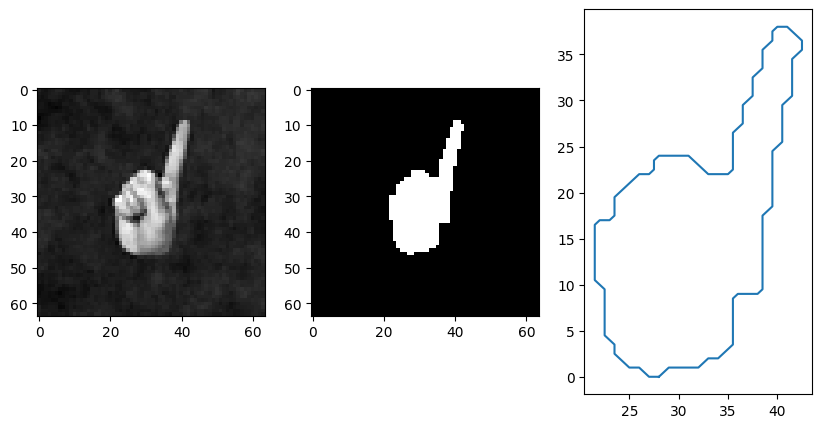

In [5]:
fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(imagen, cmap='gray')
axs[1].imshow(imagen_bn, cmap='gray')

contour = find_contours(imagen_bn, 0.5)[0]
y, x = contour.T

axs[2].plot(x, y.max()-y)


### Gráfica de una imagen de escala de grises como una superficie en 3D
La intensidad del pixel se muestra como altura

In [6]:
def plot_grayscale_surface(img, escala):

    height, width = img.shape  # Dimensiones de la imagen

    # Crea una malla de coordenadas
    x = np.linspace(0, width - 1, width)
    y = np.linspace(0, height - 1, height)
    x, y = np.meshgrid(x, y)

    # Crea la superficie 3D
    fig = go.Figure(data=[go.Surface(z=img*escala, x=x, y=y, colorscale='Gray', cmin=0, cmax=255*escala)])

    # Actualiza el diseño de la figura
    fig.update_layout(
        title='Superficie de  Imagen en Escala de Grises',
        scene=dict(
            xaxis_title='Ancho',
            yaxis_title='Alto',
            zaxis_title='Intensidad de Gris',
        ),
        width=700,  # Ancho de la figura
        height=700,  # Altura de la figura
        margin=dict(l=50, r=0, b=0, t=50)  # Márgenes de la figura
    )

    fig.show()

# Muestra plot de imagen, escala reduce la intensidad (y la altura) para mejor visualización
plot_grayscale_surface(imagen, escala=0.1)


Imágenes de los pasos de extracción de características

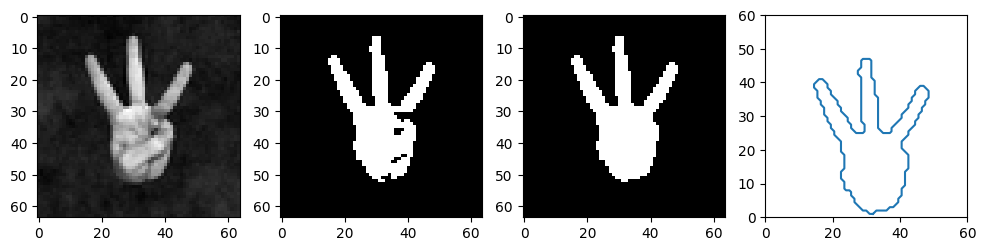

In [7]:
arch_img = DATOS_DIR + '/Fingers/samples/3L.png'
imagen = io.imread(arch_img)

# # busca umbral global con método estadístico de Otsu
umbral = threshold_otsu(imagen)

# # binariza la imagen
imagen_bn = (imagen > umbral)*1

# # cierra pequeños huecos/cortes que pudiera tener la imagen de la mano
imagen_cl = closing(imagen_bn, np.ones((3,3)))

# # remueve artefactos que pudiera tener la imagen en los bordes
imagen_lista = clear_border(imagen_cl)

# obtiene valores geométricos a partir de las regiones (objetos "aislados") en la imagen
regiones = regionprops(imagen_lista)

# datos de la primera región. Debería ser la única si la mano fue segmentada correctamente
region = regiones[0]

fig, axs = plt.subplots(1,4, figsize=(12,5))
axs[0].imshow(imagen, cmap='gray')
axs[1].imshow(imagen_bn, cmap='gray')
axs[2].imshow(imagen_cl, cmap='gray')

contour = find_contours(imagen_cl, 0.5)[0]
y, x = contour.T

axs[3].set_aspect('equal', 'box')
axs[3].set_xlim([0, 60])
axs[3].set_ylim([0, 60])
axs[3].plot(x, y.max()-y+1)



Gráfico de centroide, eje mayor, eje menor y boundingbox

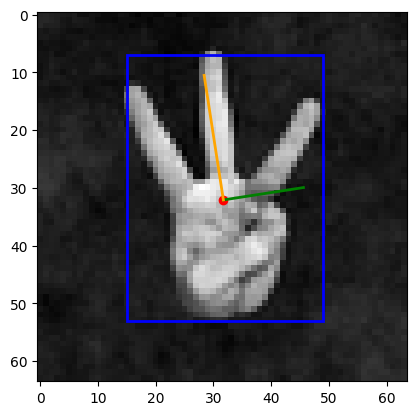

In [8]:
# Encontrar propiedades de las regiones
regions = regionprops(imagen_cl)

# Crear una figura para mostrar la imagen
fig, ax = plt.subplots()
ax.imshow(imagen, cmap='gray')

# Dibujar el contorno de la región
for region in regions:
    y, x = region.centroid
    perimeter = region.perimeter
    # centroide de la figura en rojo
    plt.scatter(x, y, c='red')  # Marcar el punto medio
    contour = region.bbox
    #bounding box (caja contenedora) en azul
    rect = plt.Rectangle((contour[1], contour[0]), contour[3] - contour[1], contour[2] - contour[0],
                         fill=False, edgecolor='blue', linewidth=2)  # Dibujar el contorno
    ax.add_patch(rect)

   # Obtener la información de la elipse ajustada a la región
    major_axis_length = region.major_axis_length
    minor_axis_length = region.minor_axis_length
    orientation = region.orientation

    # Calcular los extremos del eje mayor y el eje menor
    y0, x0 = region.centroid
    x1 = x0 + np.cos(orientation) * 0.5 * minor_axis_length
    y1 = y0 - np.sin(orientation) * 0.5 * minor_axis_length
    x2 = x0 - np.sin(orientation) * 0.5 * major_axis_length
    y2 = y0 - np.cos(orientation) * 0.5 * major_axis_length

    # Dibujar el eje menor y el eje mayor
    plt.plot((x0, x1), (y0, y1), color='green' , linewidth=2)  # Eje menor en verde
    plt.plot((x0, x2), (y0, y2), color='orange', linewidth=2)  # Eje mayor en naranja

# Mostrar la imagen con el punto medio y el contorno
plt.show()

Máscara de la imagen y su versión convexa

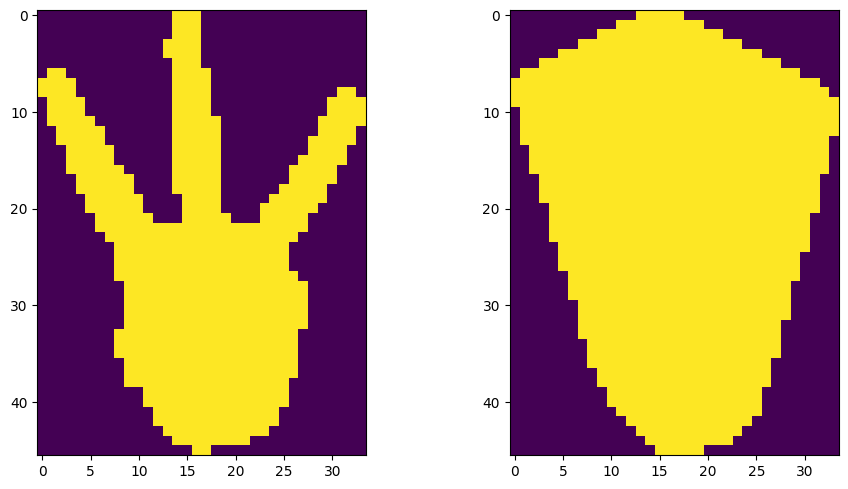

In [9]:
# Crear una figura para mostrar la imagen
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Dibujar contorno, ejes mayor y menor en la primera imagen
ax[0].imshow(regions[0].image_filled)
ax[1].imshow(regions[0].convex_image)

plt.tight_layout()
plt.show()

## Ejemplo de Manos y grafico con caracteristicas

In [11]:
# función para extraer características geométricas de un objeto dentro de una imagen
def extraer_caracteristicas(imagen):
    # busca umbral global con método estadístico de Otsu
    umbral = threshold_otsu(imagen)

    # binariza la imagen
    imagen_bn = (imagen > umbral)*1

    # cierra pequeños huecos/cortes que pudiera tener la imagen de la mano
    imagen_bn = closing(imagen_bn, np.ones((3,3)))

    # remueve artefactos que pudiera tener la imagen en los bordes
    imagen_lista = clear_border(imagen_bn)

    # extrae regiones de pixeles conectados, para los ejemplos debería haber
    # solo una única region. Para cada region obtiene distintas propiedades
    # que caracterizan a dicha region, ej: area, perimetro, centro, eje mayor y
    # menor, orientacion, coordenadas y área del recuadro que la contiene
    regiones = regionprops(imagen_lista)

    return (regiones[0], imagen_lista)

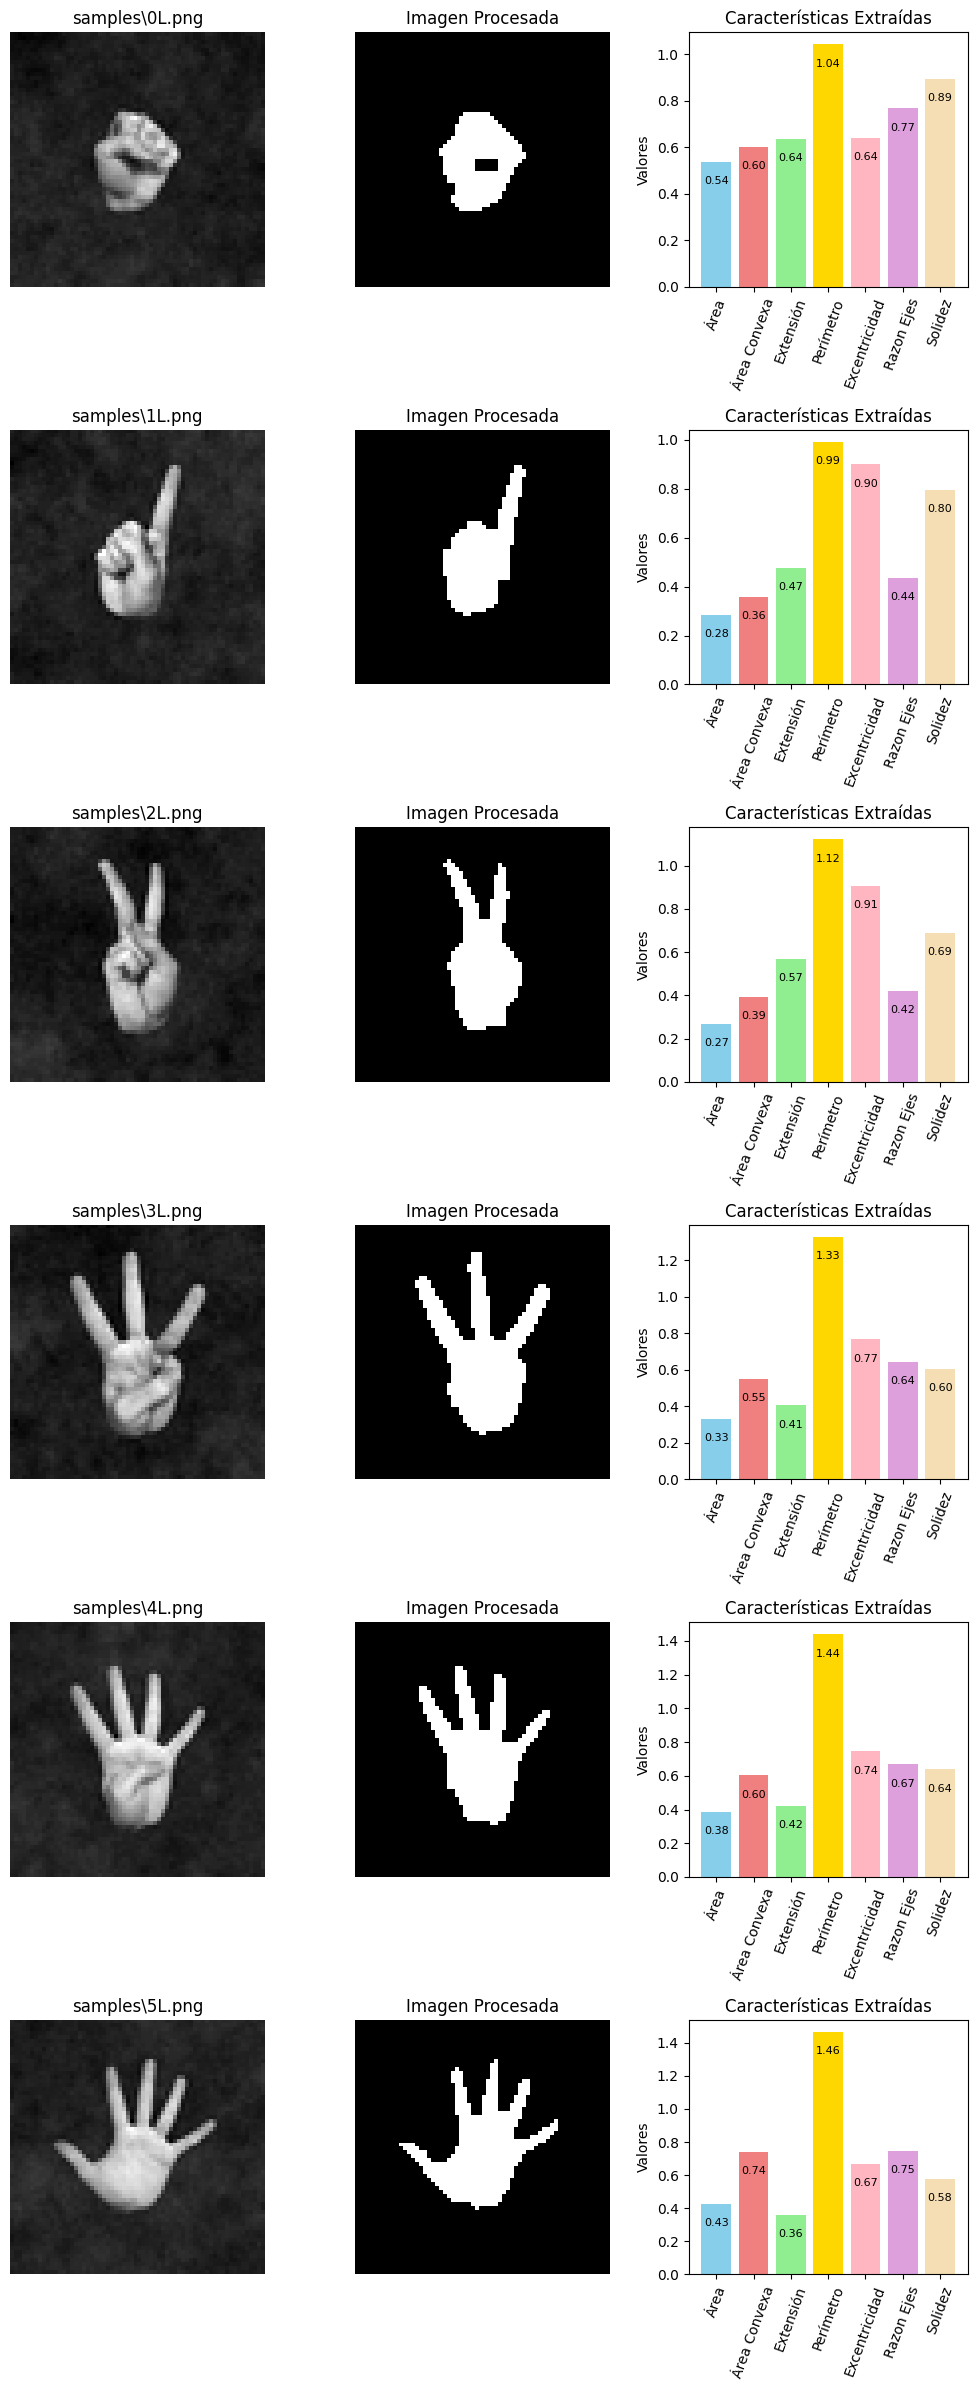

In [12]:
# Carga las imagenes de la carpeta de ejemplos para procesarlas a todas
img_list = glob.glob(DATOS_DIR + '/Fingers/samples/*.png')

# Crear una figura única para todas las imágenes
n_imagenes = len(img_list)
fig, axes = plt.subplots(n_imagenes, 3, figsize=(10, 4 * n_imagenes))

# Si solo hay una imagen, axes no será un array 2D, así que lo convertimos
if n_imagenes == 1:
    axes = axes.reshape(1, -1)

# Procesar cada imagen
for i, ruta_imagen in enumerate(sorted(img_list)):
    # Cargar la imagen
    imagen = io.imread(ruta_imagen, as_gray=True)

    # Extraer características
    region, imagen_procesada = extraer_caracteristicas(imagen)

    # Obtener el nombre del archivo para el título
    nombre_archivo = ruta_imagen.split('/')[-1]

    # Mostrar imagen original
    axes[i, 0].imshow(imagen, cmap='gray')
    axes[i, 0].set_title(f'{nombre_archivo}')
    axes[i, 0].axis('off')

    # Mostrar imagen procesada
    axes[i, 1].imshow(imagen_procesada, cmap='gray')
    axes[i, 1].set_title(f'Imagen Procesada')
    axes[i, 1].axis('off')

    # Extraer características numéricas normalizadas para el gráfico de barras
    # valores que:
    #  * son coeficientes => no requieren normalizar
    #  * son lineales => dividen por una longitud
    #  * son cuadrados => dividen por un area
    norm_area = region.major_axis_length * region.major_axis_length
    norm_long = (region.major_axis_length + region.minor_axis_length) / 2

    caracteristicas = {
        'Área': region.area / norm_area,
        'Área Convexa': region.convex_area / norm_area,
        'Extensión': region.extent, # area / area_bbox
        'Perímetro':  region.perimeter/(4 * norm_long),
        'Excentricidad': region.eccentricity, # 0=circular, 1=elipce muy excentrica
        'Razon Ejes': region.minor_axis_length / region.major_axis_length,
        'Solidez': region.solidity # area / convex_area
    }

    # Crear gráfico de barras
    nombres = list(caracteristicas.keys())
    valores = list(caracteristicas.values())

    barras = axes[i, 2].bar(nombres, valores, color=['skyblue', 'lightcoral', 'lightgreen',
                                                   'gold', 'lightpink', 'plum', 'wheat'])
    axes[i, 2].set_title('Características Extraídas')
    axes[i, 2].set_ylabel('Valores')
    axes[i, 2].tick_params(axis='x', rotation=70)

    # Añadir valores en las barras
    for barra, valor in zip(barras, valores):
        height = barra.get_height()
        axes[i, 2].text(barra.get_x() + barra.get_width()/2., height - max(valores)*0.1,
                       f'{valor:.2f}', ha='center', va='bottom', fontsize=8)


plt.tight_layout()
plt.show()